## 딥러닝
### 인공신경망

#### TensorFlow
- https://www.tensorflow.org/?hl=ko
- 딥러닝 라이브러리 중 가장 유명
- 구글 브레인팀에서 개발

#### Pytorch
- https://pytorch.org/
- https://pytorch.kr/
- 메타(페이스북)에서 개발한 딥러닝 라이브러리
- GPU 사용이 매우 용이


#### MNIST 데이터
- AI에서 많이 사용하는 데이터셋 중 하나
- 미국 국립표준기술연구소에서 배포하는 이미지 데이터
- 손글씨(0~9) , 붓꽃데이터, 패션데이터, Cifar10(컬러이미지) 등 존재

#### Fashion MNIST


#### 머신러닝 실습

In [9]:
# 텐서플로 사용
from tensorflow import keras

In [10]:
# 패션 mnist를 로드하면서 훈련세트와 테스트세트로 분리
# sklearn train_test_split()와 변수 배치가 다름!

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [11]:
# 60000개 이미지 데이터, 넓이 28 픽셀, 높이 28픽셀
train_input.shape

(60000, 28, 28)

In [12]:
# 60000개 이미지에 대한 분류값
train_target.shape

(60000,)

#### 이미지 시각화

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [15]:
sns.set_style('darkgrid')

# 시본 사용시 한글깨짐 해결
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus':False}) 

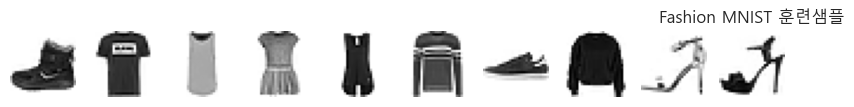

In [22]:
# 10개 차트 그리기
fig, axes = plt.subplots(1, 10, figsize = (10,10))          # 1행 10열로 서브플롯(작은 그래프들) /  너비 10인치, 높이 10인치
for i in range(10) :
    axes[i].imshow(train_input[i], cmap = 'gray_r')
    axes[i].axis('off')                                     # 각 서브플롯의 축 눈금, 테두리, 숫자를 없애요. 깔끔하게 이미지만 보이게 하려고요.

plt.title('Fashion MNIST 훈련샘플')
plt.show()

- 이미지는 픽셀당 흑백은 1바이트, 컬러는 3 또는 4바이트 사용
- 해상도가 커지면 이미지 파일 사이즈가 기하급수적으로 증가
- 28x28 정도로 해상도 제한

In [23]:
# 각 이미지의 분류값
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

|레이블|0|1|2|3|4|5|6|7|8|9|
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|패션MNIST|티셔츠|바지|스웨터|드레스|코트|샌들|셔츠|스니커즈|가방|앵클부츠

In [24]:
# 60000개 데이터에서 각 레이블별 6000개씩 이미지가 존재
np.unique(train_target, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

#### 사이킷런 머신러닝, 로지스틱회귀로 아이템 분류

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # 필요없음. keras에서 이미 나눠져있는 상태임

##### 이미지 처리
- 28 x 28  2차원배열을 784 1차원배열로 변경해줘야 함
<img src = './2차원배열을 1차원배열로.png'>

In [30]:
# 2D이미지를 1D 벡터(1차원배열)로 펼치기
# train_input.shape  (60000, 28, 28)
train_input = train_input.reshape(-1, 28*28)
train_input.shape #(60000, 784)

(60000, 784)

In [31]:
test_input = test_input.reshape(-1 , 28*28)
test_input.shape

(10000, 784)

In [34]:
# 스케일링
scale = StandardScaler()
train_scaled = scale.fit_transform(train_input.astype(np.float64))
test_scaled = scale.transform(test_input.astype(np.float64))

In [36]:
# 로지스틱 회귀
lr = LogisticRegression(C=20 ,max_iter=1000 )
lr


LogisticRegression(C=20, max_iter=1000)

In [37]:
#훈련
lr.fit(train_scaled, train_target)

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, max_iter=1000)

- 60000건 훈련하는데 대략 1분 40초 소요됨

In [41]:
lr.score(train_scaled,train_target)

0.8876666666666667

In [39]:
lr.score(test_scaled,test_target)

0.8308

In [45]:
# 예측
pre_result =lr.predict(test_scaled)

In [51]:
# 실제 테스트 이미지와 예측 테스트 이미지 시각화
def show_image(index) :
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28,28) , cmap='gray_r')
    plt.title(f'실제: {test_target[index]} , 예측 : {pre_result[index]}')
    plt.axis('off')
    plt.show()

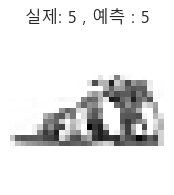

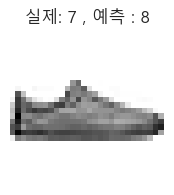

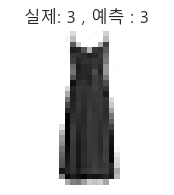

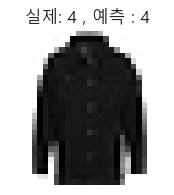

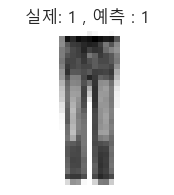

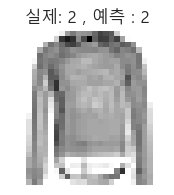

In [53]:
for i in range(11,17):
    show_image(i)

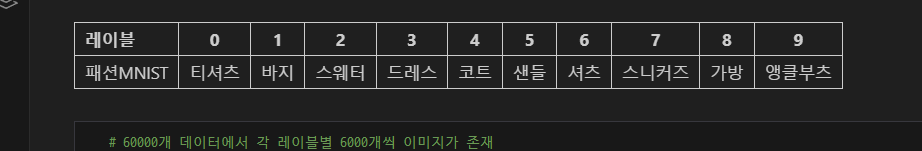
- 6개 중 1개 틀림. 5개는 맞음

- 여기까지 머신러닝으로 처리

#### 인공신경망
- 인간의 뇌속 뉴런과 유사한 구조로 만든 것
- 인공신경망을 이용해서 머신러닝 훈련과 테스트 예측 등을 수행하는 것
- 인공지능 ⊃ 머신러닝 ⊃ 인공신경망(딥러닝) 
<img src ='./인공신경망.png'>

In [55]:
# 텐서플로 모듈 로드
import tensorflow as tf
from tensorflow import keras

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# train_test_split()함수로 기존 훈련세트를 훈련세트:검증세트 8:2로 분리리
train_scaled, val_scaled , train_target, val_target= train_test_split(
    train_scaled, train_target, random_state=42 , test_size=0.2


)

In [58]:
train_scaled.shape

(48000, 784)

- 기존 훈련세트 ->60000
- 새 훈련세트 ->48000
- 검증세트 -> 12000

- 밀집층(Dense layer)
    - 784픽셀(28*28)을 10개(분류된 아이템 개수) 뉴런 연결하면 총 7840 연결선이 만들어짐

In [59]:
# 매개변수
## 10 출력값(아이템 0~9)
## 활성화함수 - softmax , 시그모이드, ReLu
## input_shape - 28*28     - 1차원배열이미지
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))


In [60]:
dense

In [61]:
#Sequential 모델은 Keras에서 제공하는 모델의 한 종류로, 층을 순차적으로 쌓아올리는 방식입니다.
#Dense는 신경망에서 기본적으로 사용하는 완전 연결층(Fully Connected Layer)
model = keras.Sequential(dense)

In [62]:
# 훈련 전 설정

#sparse_categorical_crossentropy**는 다중 클래스 분류 문제에서 주로 사용하는 손실 함수입니다
#sparse_categorical_crossentropy가 정수 형식의 레이블을 사용하는 경우에 사용된다는 것입니다. 
# 즉, 레이블이 원-핫 인코딩(one-hot encoding) 형식이 아니라 각 클래스의 정수 인덱스(예: 0, 1, 2, ...)로 제공될 때 적합합니다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [63]:
#훈련
model.fit(train_scaled,train_target,epochs=10)

Epoch 1/10


1500/1500 [==============================] - 1s 744us/step - loss: 0.5433 - accuracy: 0.8168
Epoch 2/10
1500/1500 [==============================] - 1s 740us/step - loss: 0.4607 - accuracy: 0.8454
Epoch 3/10
1500/1500 [==============================] - 1s 715us/step - loss: 0.4458 - accuracy: 0.8518
Epoch 4/10
1500/1500 [==============================] - 1s 732us/step - loss: 0.4403 - accuracy: 0.8546
Epoch 5/10
1500/1500 [==============================] - 1s 720us/step - loss: 0.4328 - accuracy: 0.8569
Epoch 6/10
1500/1500 [==============================] - 1s 724us/step - loss: 0.4310 - accuracy: 0.8564
Epoch 7/10
1500/1500 [==============================] - 1s 858us/step - loss: 0.4275 - accuracy: 0.8591
Epoch 8/10
1500/1500 [==============================] - 1s 763us/step - loss: 0.4279 - accuracy: 0.8600
Epoch 9/10
1500/1500 [==============================] - 1s 944us/step - loss: 0.4245 - accuracy: 0.8606
Epoch 10/10
1500/1500 [==============================] - 1s 88

In [64]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 649us/step - loss: 0.5122 - accuracy: 0.8449


[0.5121584534645081, 0.8449166417121887]

In [65]:
model.fit(train_scaled,train_target,epochs=1000)

Epoch 1/1000
1500/1500 [==============================] - 1s 715us/step - loss: 0.4238 - accuracy: 0.8620
Epoch 2/1000
1500/1500 [==============================] - 1s 724us/step - loss: 0.4241 - accuracy: 0.8617
Epoch 3/1000
1500/1500 [==============================] - 1s 741us/step - loss: 0.4208 - accuracy: 0.8626
Epoch 4/1000
1500/1500 [==============================] - 1s 743us/step - loss: 0.4198 - accuracy: 0.8631
Epoch 5/1000
1500/1500 [==============================] - 1s 691us/step - loss: 0.4189 - accuracy: 0.8631
Epoch 6/1000
1500/1500 [==============================] - 1s 678us/step - loss: 0.4189 - accuracy: 0.8638
Epoch 7/1000
1500/1500 [==============================] - 1s 680us/step - loss: 0.4205 - accuracy: 0.8636
Epoch 8/1000
1500/1500 [==============================] - 1s 684us/step - loss: 0.4192 - accuracy: 0.8637
Epoch 9/1000
1500/1500 [==============================] - 1s 680us/step - loss: 0.4191 - accuracy: 0.8637
Epoch 10/1000
1500/1500 [=====================

In [66]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 659us/step - loss: 1.0410 - accuracy: 0.8290


[1.0409847497940063, 0.8289999961853027]

#### 결론
- `딥러닝` : 인공신경망. 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘
    - 이미지, 음성, 텍스트, 영상 분야에 뛰어난 성능 발휘
- `밀집층` :    Dense Layer. 가장 간단한 인공신경망
- `원-핫 인코딩` : 해당 요소만 1로 나머지는 0으로 변환하는 방식
    - 패션mnist 클래스 10개를 예를 들어보면
    - [1,0,0,0,0,0,0,0,0,0] - 티셔츠
    - [0,0,0,0,0,0,0,1,0,0] - 스니커즈